In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from gtda.diagrams import PersistenceEntropy, Amplitude, NumberOfPoints, ComplexPolynomial, PersistenceLandscape, HeatKernel, Silhouette, BettiCurve, PairwiseDistance, ForgetDimension

from scipy.stats import randint
import matplotlib.pyplot as plt

# Import and Concatenate Data

In [49]:
# Training data features
train_summary_statistics = topological_summary_statistics = pd.read_csv("Features/Train_Topological_Summary_Statistics.csv")
train_statistical_features = pd.read_csv("Features/Train_Statistical_Features.csv")
train_wasserstein_features = pd.read_csv("Features/Train_Wasserstein_Features.csv")
train_advanced_features = pd.read_csv("Features/Train_Advanced_Features.csv")

# Concatenate topological summary statistics and statistical features
train_features_df = pd.merge(train_summary_statistics, train_statistical_features, left_index=True, right_index=True)
labels = train_features_df["Label_y"]
train_features_df.drop(train_features_df.columns[train_features_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
train_features_df.drop(train_features_df.columns[train_features_df.columns.str.contains('Label_',case = False)],axis = 1, inplace = True)

# Concatenate merged dataframe and Wasserstein distances to barycenter
train_features_df = pd.merge(train_features_df, train_wasserstein_features, left_index=True, right_index=True)
train_features_df.drop(train_features_df.columns[train_features_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
train_features_df.drop(train_features_df.columns[train_features_df.columns.str.contains('Label_',case = False)],axis = 1, inplace = True)

# Concatenate merged dataframe and advanced features (Adcock-Carlson coordinates,...)
train_features_df = pd.merge(train_features_df, train_advanced_features, left_index=True, right_index=True)
train_features_df.drop(train_features_df.columns[train_features_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
train_features_df.drop(train_features_df.columns[train_features_df.columns.str.contains('Label_',case = False)],axis = 1, inplace = True)

train_features_df["Label"] = labels

In [50]:
# Testing data features
test_summary_statistics = topological_summary_statistics = pd.read_csv("Features/Test_Topological_Summary_Statistics.csv")
test_statistical_features = pd.read_csv("Features/Test_Statistical_Features.csv")
test_wasserstein_features = pd.read_csv("Features/Test_Wasserstein_Features.csv")
test_advanced_features = pd.read_csv("Features/Test_Advanced_Features.csv")


# Concatenate topological summary statistics and statistical features
test_features_df = pd.merge(test_summary_statistics, test_statistical_features, left_index=True, right_index=True)
labels = test_features_df["Label_y"]
test_features_df.drop(test_features_df.columns[test_features_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_features_df.drop(test_features_df.columns[test_features_df.columns.str.contains('Label_',case = False)],axis = 1, inplace = True)

# Concatenate merged dataframe and Wasserstein distances to barycenter
test_features_df = pd.merge(test_features_df, test_wasserstein_features, left_index=True, right_index=True)
test_features_df.drop(test_features_df.columns[test_features_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_features_df.drop(test_features_df.columns[test_features_df.columns.str.contains('Label_',case = False)],axis = 1, inplace = True)

# Concatenate merged dataframe and advanced features (Adcock-Carlson coordinates,...)
test_features_df = pd.merge(test_features_df, test_advanced_features, left_index=True, right_index=True)
test_features_df.drop(test_features_df.columns[test_features_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_features_df.drop(test_features_df.columns[test_features_df.columns.str.contains('Label_',case = False)],axis = 1, inplace = True)

test_features_df["Label"] = labels

In [51]:
# Diagrams

train_persistence_diagrams_label_1 = np.load("Embeddings_and_Persistence_Diagrams/Train_PD1.npy", allow_pickle=True)
test_persistence_diagrams_label_1 = np.load("Embeddings_and_Persistence_Diagrams/Test_PD1.npy", allow_pickle=True)

train_persistence_diagrams_label_3 = np.load("Embeddings_and_Persistence_Diagrams/Train_PD3.npy", allow_pickle=True)
test_persistence_diagrams_label_3 = np.load("Embeddings_and_Persistence_Diagrams/Test_PD3.npy", allow_pickle=True)

train_persistence_diagrams_label_5 = np.load("Embeddings_and_Persistence_Diagrams/Train_PD5.npy", allow_pickle=True)
test_persistence_diagrams_label_5 = np.load("Embeddings_and_Persistence_Diagrams/Test_PD5.npy", allow_pickle=True)

train_persistence_diagrams_label_7 = np.load("Embeddings_and_Persistence_Diagrams/Train_PD7.npy", allow_pickle=True)
test_persistence_diagrams_label_7 = np.load("Embeddings_and_Persistence_Diagrams/Test_PD7.npy", allow_pickle=True)

In [52]:
# Shortened Diagrams

train_short_persistence_diagrams_label_1 = np.load("Embeddings_and_Persistence_Diagrams/Train_Shortened_Diagrams1.npy", allow_pickle=True)
test_short_persistence_diagrams_label_1 = np.load("Embeddings_and_Persistence_Diagrams/Test_Shortened_Diagrams1.npy", allow_pickle=True)

train_short_persistence_diagrams_label_3 = np.load("Embeddings_and_Persistence_Diagrams/Train_Shortened_Diagrams3.npy", allow_pickle=True)
test_short_persistence_diagrams_label_3 = np.load("Embeddings_and_Persistence_Diagrams/Test_Shortened_Diagrams3.npy", allow_pickle=True)

train_short_persistence_diagrams_label_5 = np.load("Embeddings_and_Persistence_Diagrams/Train_Shortened_Diagrams5.npy", allow_pickle=True)
test_short_persistence_diagrams_label_5 = np.load("Embeddings_and_Persistence_Diagrams/Test_Shortened_Diagrams5.npy", allow_pickle=True)

train_short_persistence_diagrams_label_7 = np.load("Embeddings_and_Persistence_Diagrams/Train_Shortened_Diagrams7.npy", allow_pickle=True)
test_short_persistence_diagrams_label_7 = np.load("Embeddings_and_Persistence_Diagrams/Test_Shortened_Diagrams7.npy", allow_pickle=True)


# Visualizations

## Box plots

12


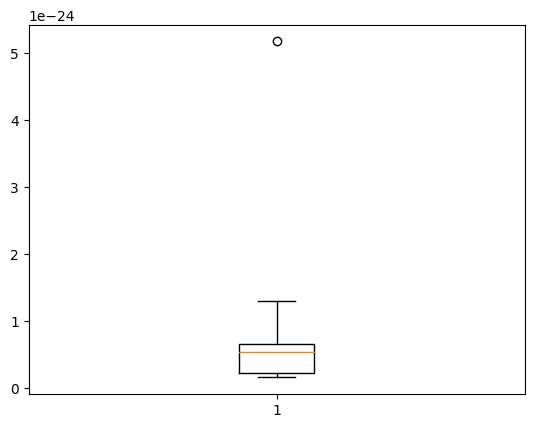

In [53]:
test_summary_statistics = topological_summary_statistics = pd.read_csv("Features/Test_Topological_Summary_Statistics.csv")
test_statistical_features = pd.read_csv("Features/Test_Statistical_Features.csv")
test_wasserstein_features = pd.read_csv("Features/Test_Wasserstein_Features.csv")
test_advanced_features = pd.read_csv("Features/Test_Advanced_Features.csv")

explored_df = test_advanced_features
explored_df = explored_df["AC_coordinate_cc3"][explored_df["Label"] == 5]
print(len(explored_df))


plt.boxplot(explored_df)

# show plot
plt.show()

33


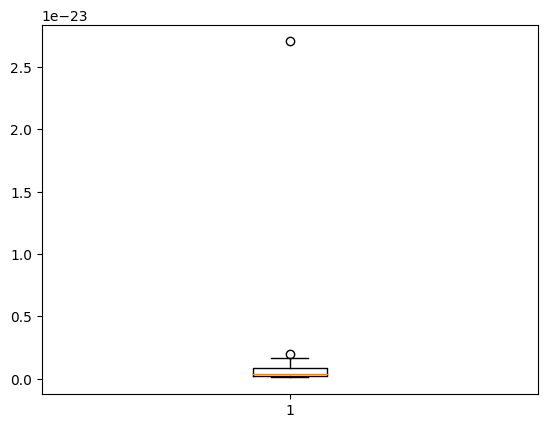

In [54]:
# Train data
train_summary_statistics = topological_summary_statistics = pd.read_csv("Features/Train_Topological_Summary_Statistics.csv")
train_statistical_features = pd.read_csv("Features/Train_Statistical_Features.csv")
train_wasserstein_features = pd.read_csv("Features/Train_Wasserstein_Features.csv")
train_advanced_features = pd.read_csv("Features/Train_Advanced_Features.csv")

explored_df = train_advanced_features
explored_df = explored_df["AC_coordinate_cc3"][explored_df["Label"] == 5]
print(len(explored_df))


plt.boxplot(explored_df)


# show plot
plt.show()

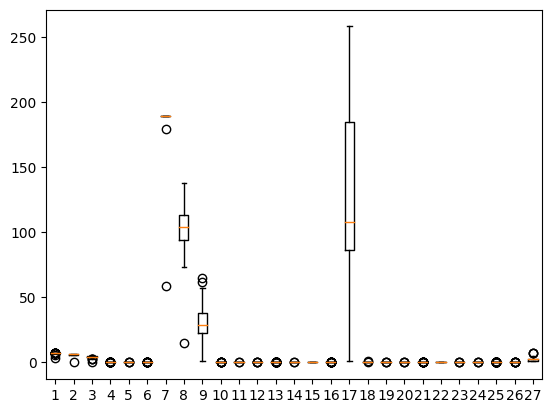

In [55]:
# Train data
plt.boxplot(test_features_df)

# show plot
plt.show()

## Heat Kernel

In [56]:
HK = HeatKernel(sigma=0.00003, n_bins=100)

In [57]:
def heat_kernel_intensity(heatkernel, homology_dimension):
    """ Computes mean intensity of a heatkernel. Only takes positive values because otherwise the mean would
      always be zero.

    Parameters:
    - heatkernel (list of lists): heatkernel of all homology dimensions
    - homology_dimension (int): Which homology dimension to look at (0, 1 or 2)

    Returns:
    - mean intensity of heatkernel of homology dimension homology_dimension
    """
    
    positives =  [x for inner_list in heatkernel[0][homology_dimension] for x in inner_list if x > 0]
    
    return np.mean(positives)

### Homology dimension 0

#### Label 1

Heat kernel intensity of label 1 for homology dimension 0: 5076222699.718398


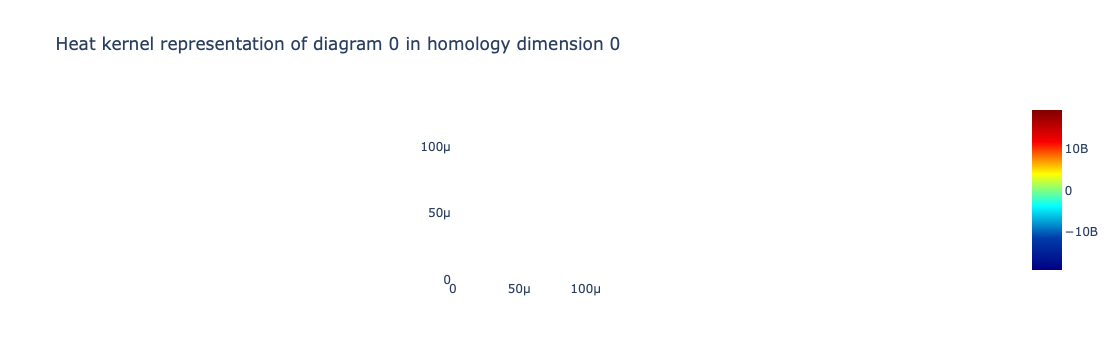

In [58]:
heatkernel = HK.fit_transform(train_short_persistence_diagrams_label_1)
print("Heat kernel intensity of label 1 for homology dimension 0: " + str(heat_kernel_intensity(heatkernel, 0)))
HK.plot(heatkernel, homology_dimension_idx=0, colorscale='jet')

Heat kernel intensity of label 3 for homology dimension 0: 2831856766.7105665


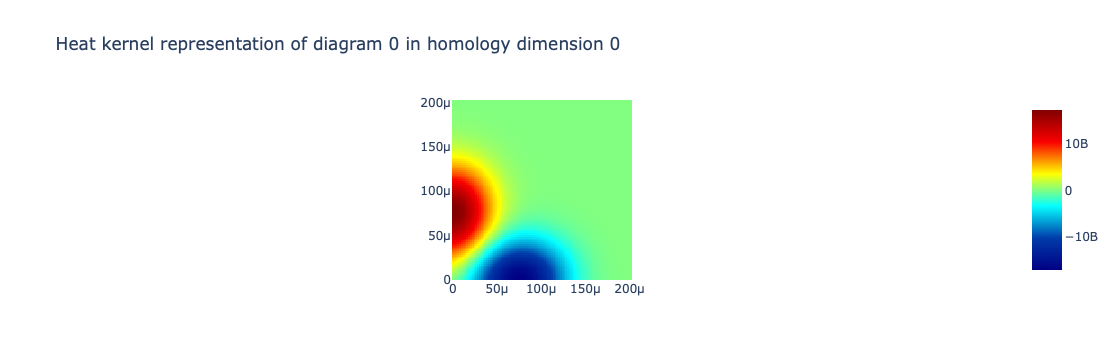

In [59]:
heatkernel = HK.fit_transform(train_short_persistence_diagrams_label_3)
print("Heat kernel intensity of label 3 for homology dimension 0: " + str(heat_kernel_intensity(heatkernel, 0)))
HK.plot(heatkernel, homology_dimension_idx=0, colorscale='jet')

Heat kernel intensity of label 5 for homology dimension 0: 5406393933.382456


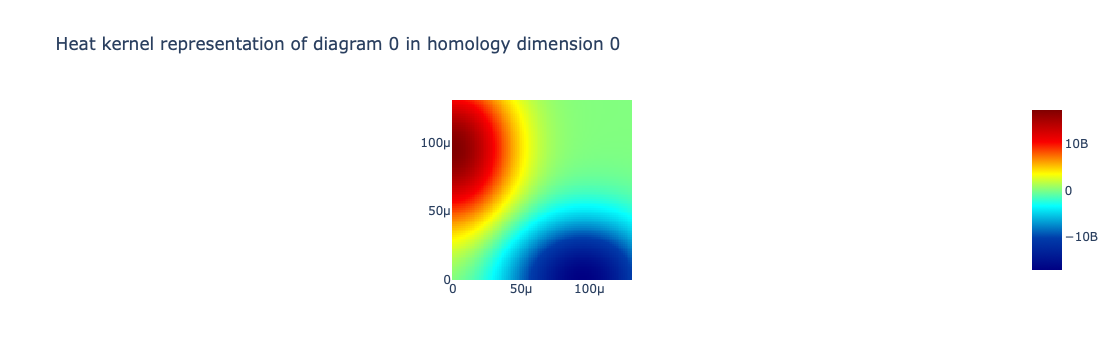

In [60]:
heatkernel = HK.fit_transform(train_short_persistence_diagrams_label_5)
print("Heat kernel intensity of label 5 for homology dimension 0: " + str(heat_kernel_intensity(heatkernel, 0)))

HK.plot(heatkernel, homology_dimension_idx=0, colorscale='jet')

Heat kernel intensity of label 7 for homology dimension 0: 8385554457.545019


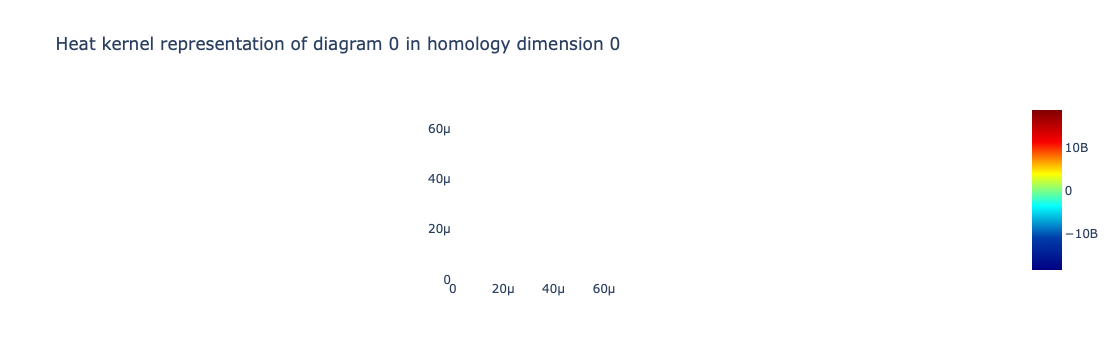

In [61]:
heatkernel = HK.fit_transform(train_short_persistence_diagrams_label_7)
print("Heat kernel intensity of label 7 for homology dimension 0: " + str(heat_kernel_intensity(heatkernel, 0)))

HK.plot(heatkernel, homology_dimension_idx=0, colorscale='jet')

# Persistence Landscape

In [62]:
PL = PersistenceLandscape()

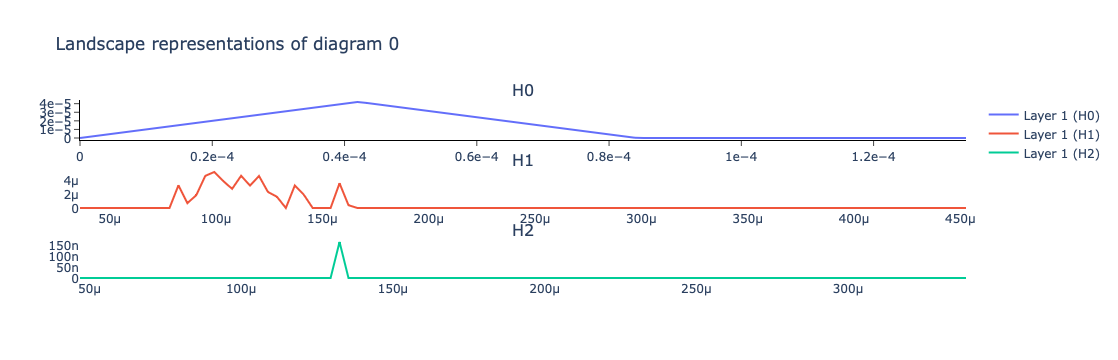

In [63]:
landscape = PL.fit_transform(train_short_persistence_diagrams_label_1)
PL.plot(landscape)

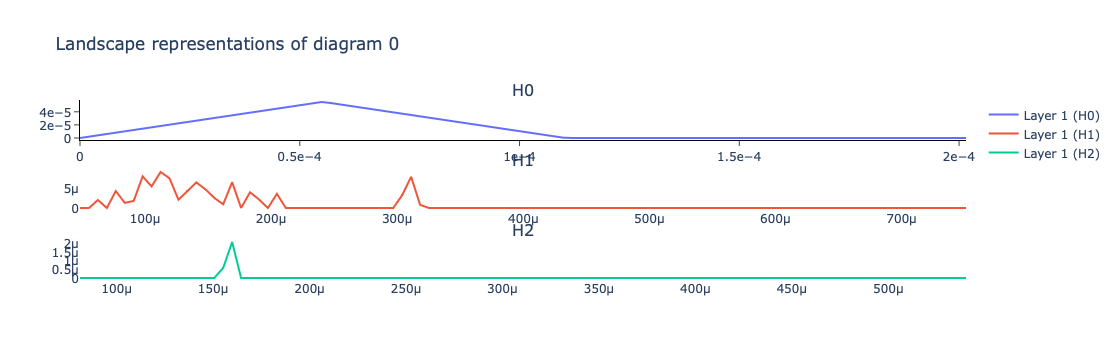

In [64]:
landscape = PL.fit_transform(train_short_persistence_diagrams_label_3)
PL.plot(landscape)

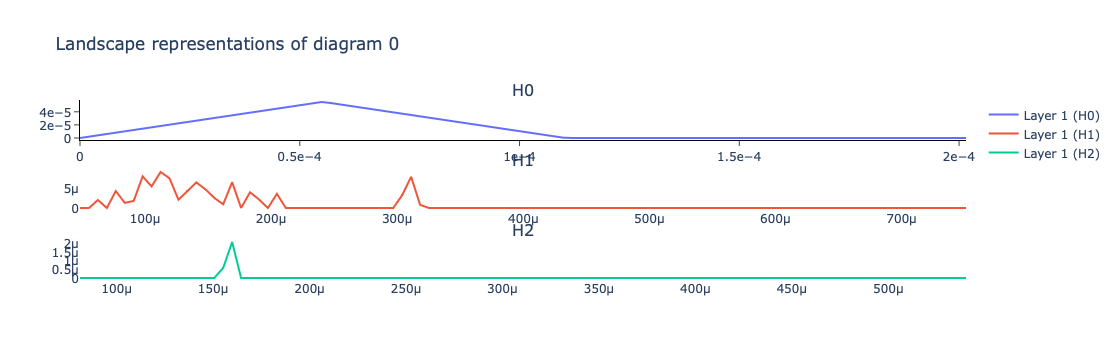

In [65]:
landscape = PL.fit_transform(train_short_persistence_diagrams_label_3)
PL.plot(landscape)


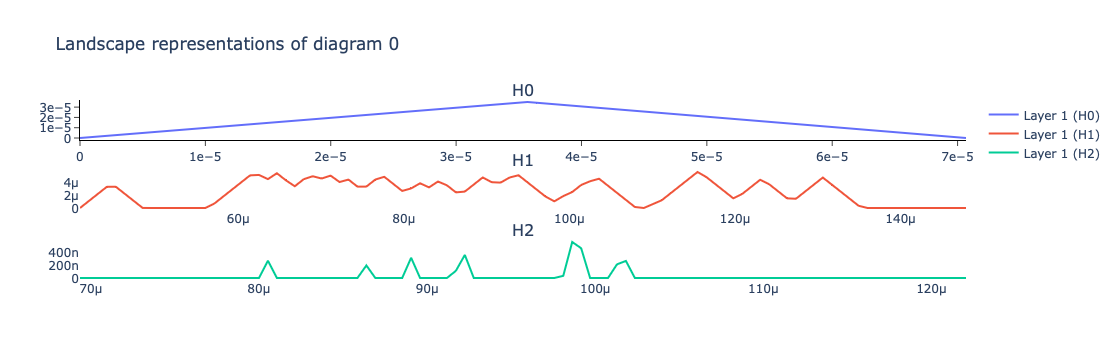

In [66]:
landscape = PL.fit_transform(train_short_persistence_diagrams_label_7)
PL.plot(landscape)

# Silhouette

In [67]:
SH = Silhouette()


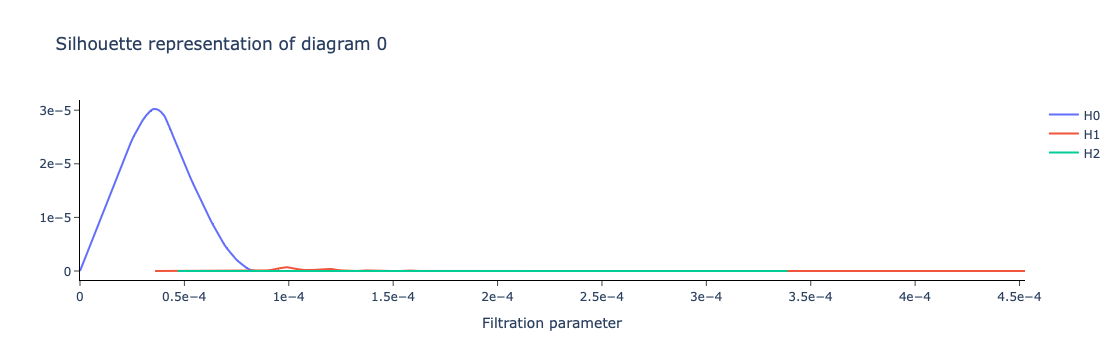

In [70]:
silhouette = SH.fit_transform(train_short_persistence_diagrams_label_1)

SH.plot(silhouette, homology_dimensions = [0, 1, 2])

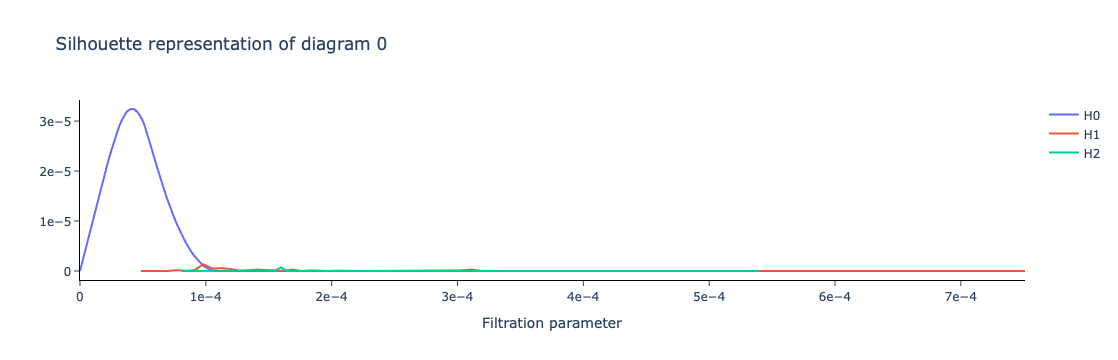

In [72]:
silhouette = SH.fit_transform(train_short_persistence_diagrams_label_3)

SH.plot(silhouette, homology_dimensions = [0, 1, 2])

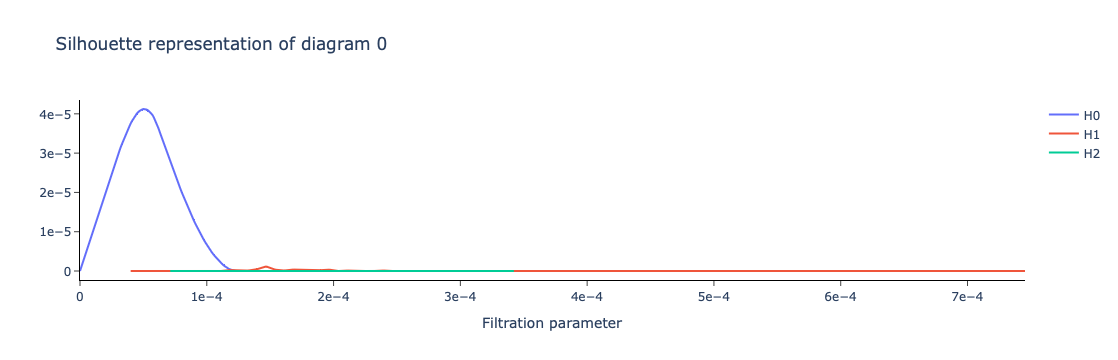

In [73]:
silhouette = SH.fit_transform(train_short_persistence_diagrams_label_5)

SH.plot(silhouette, homology_dimensions = [0, 1, 2])

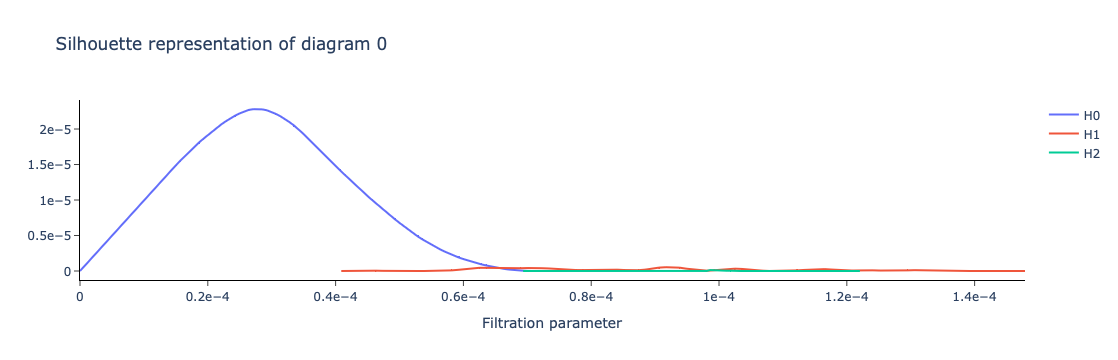

In [74]:
silhouette = SH.fit_transform(train_short_persistence_diagrams_label_7)

SH.plot(silhouette, homology_dimensions = [0, 1, 2])